# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [1]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
    words = email.split()
    return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
    word_stemmer = PorterStemmer()
    stem_words = [word_stemmer.stem(w) for w in words]
    return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stem_words):
    stop_words = stopwords.words('english')
    stem_no_stop_words = [word for word in stem_words if not word in stop_words]
    return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(stem_no_stop_words):
    for i in stem_no_stop_words:
        if i not in vocab:
            vocab.append(i);
    return vocab

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_words, vocab):
    get_bow = []
    for word in vocab:
        if word in stem_words:
            get_bow.append(1)
        else:
            get_bow.append(0)
    return get_bow
            

# read the entire dataset
def read_data():
    data = np.genfromtxt("spam_or_not_spam.csv", delimiter = ',',dtype = str,  encoding='utf-8')
    data = np.delete(data, 0, axis = 0)
    return data

# convert emails to bow and maintain their labels
# call function text_to_bow()

data_x = []
def text_to_bow(data):
    for i in data:
        email = i[0]
        words = read_email(email)
        stem_words = stemming(words)
        stem_no_stop_words = remove_stop_words(stem_words)
        vocab = build_vocabulary(stem_no_stop_words)
        email_bow = get_bow(stem_words, vocab)
        data_x.append(email_bow)
    return data

In [2]:
vocab = []
data = read_data()
dat_y = data[:,1]
data = text_to_bow(data)

In [3]:
k = 0
for A in data_x:
    i = len(A)
    for j in range(i, len(vocab)):
        A.append(0)
    
dat_x = np.array([np.array(xi) for xi in data_x])
dat_x = np.insert(dat_x,0,0, axis = 1)

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

In [4]:
freq = dat_x.sum(axis=0)
freq = freq[1:]
freq_nonspam = np.zeros(len(vocab))
freq_spam = np.zeros(len(vocab))

print(freq)

i = 0
for A in dat_x:
    if dat_y[i] == '0':
        freq_nonspam = np.add(freq_nonspam, A[1:]) 
    if dat_y[i] == '1':
        freq_spam = np.add(freq_spam, A[1:])
    i += 1
        
print(freq_nonspam)
print(freq_spam)

[ 830  139 2476 ...    1    1    1]
[ 805.  137. 2042. ...    0.    0.    0.]
[ 25.   2. 434. ...   1.   1.   1.]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# visuallze data distribution
def data_vis(freq, vocab):
    plt.figure()
    plt.plot(vocab,freq)
    plt.xlabel('Vocabulary')
    plt.ylabel('Frequency')
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    return



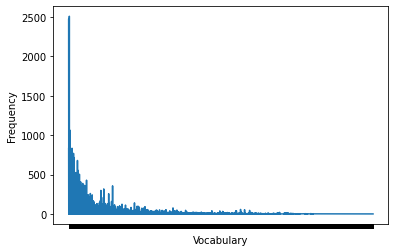

In [6]:
#Frequency vs Vocabulary for all emails
data_vis(freq,vocab)

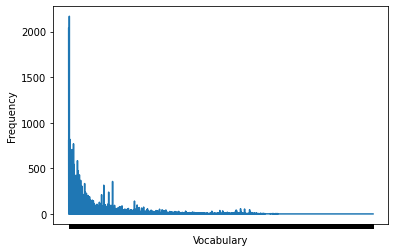

In [7]:
#Frequency vs Vocabulary for all non spam emails
data_vis(freq_nonspam,vocab)

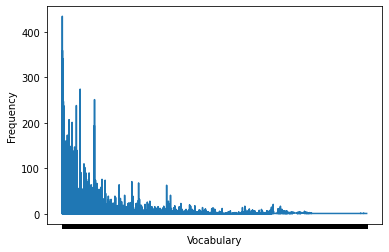

In [8]:
#Frequency vs Vocabulary for all spam emails
data_vis(freq_spam,vocab)

In [9]:
dat_y = np.array([int(string) for string in dat_y])

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# split dataset
def split(dat_x, dat_y):
    a_ar, b_ar = dat_x, dat_y
    p = np.random.permutation(len(dat_y))
    a, b = a_ar[p].tolist(), b_ar[p].tolist()
    size = int(0.8*len(dat_y))
    a_train = a[:size]
    b_train = b[:size]
    a_test = a[size:]
    b_test = b[size:]
    return a_train, b_train, a_test, b_test

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_x,train_y,test_x):
    clf = svm.SVC()
    clf.fit(train_x, train_y)
    predict_labels_test = clf.predict(test_x)
    predict_labels_train = clf.predict(train_x)
    return predict_labels_test, predict_labels_train

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_x,train_y,test_x):
    neigh = KNeighborsClassifier(n_neighbors=11)
    neigh.fit(train_x, train_y)
    predict_labels_test = neigh.predict(test_x)
    predict_labels_train = neigh.predict(train_x)
    return predict_labels_test, predict_labels_train


In [11]:
train_x, train_y, test_x, test_y = split(dat_x, dat_y)
predict_labels_svm_test, predict_labels_svm_train = svm_classifier(train_x,train_y,test_x)
predict_labels_knn_test, predict_labels_knn_train = knn_classifier(train_x,train_y,test_x)

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [12]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
    acc = np.sum(np.equal(true_labels, predicted_labels)) / len(true_labels)
    return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
    auc = metrics.roc_auc_score(true_labels, predicted_labels)
    return auc


In [13]:
# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
acc_svm_test = compute_accuracy(test_y, predict_labels_svm_test)
acc_knn_test = compute_accuracy(test_y, predict_labels_knn_test)

auc_svm_test = compute_auc(test_y, predict_labels_svm_test)
auc_knn_test = compute_auc(test_y, predict_labels_knn_test)

In [14]:
print(acc_svm_test)
print(acc_knn_test)

print(auc_svm_test)
print(acc_knn_test)

0.97
0.9383333333333334
0.9217068645640074
0.9383333333333334


In [15]:
acc_svm_train = compute_accuracy(train_y, predict_labels_svm_train)
acc_knn_train = compute_accuracy(train_y, predict_labels_knn_train)

auc_svm_train = compute_auc(train_y, predict_labels_svm_train)
auc_knn_train = compute_auc(train_y, predict_labels_knn_train)

In [16]:
print(acc_svm_train)
print(acc_knn_train)

print(auc_svm_train)
print(acc_knn_train)

0.995
0.9575
0.9846153846153847
0.9575
